# Learning Econometrics in a unique way:
So far, I have just been reading the assumptions and statements given in the textbook as facts, and never actually stopped to question myself 'Why'?
Hence, here are a few ideas that I'd be covering in this jupiter file:
- Stating the assumptions (Simple and Multiple linear regressions)and actually testing them using fabricated sample data/datasets found on kaggle
- Creating a table to show clear calculation of the residuals, error terms, etc
- Creating neat regression tables with p-values shown and interpreting these values for fun regressions (like impact of taylor swift's songs on peoples' moods, movie dataset, etc.)

My ultimate goal is learn this subject properly, and also share this knowledge to people around the world.
In this goal, I wish to cover:
- Handling and setting up my data properly for regressions
- Writing clean lines of code with proper comments
- Creating great visualizations using matplotlib and seaborn
- (Maybe in the future)Creating animated plots using dash for people to understand econometrics even better

## 01. Showing the meaning of unbiasedness using data

#### 01. Importing the required libraries:


In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### 02. Creating a fixed population and setting the parameter values 
The PRF is given by $$ y = \beta_0 + \beta_1 x + u $$

Our explanatory variable follows a uniform distribution to avoid clustering around the mean. Error term is normally distributed following the OLS assumption that over large values, the error term is normally distributed. 

In [ ]:
np.random.seed(42)  # For reproducibility
N = 100000  # Population size
beta_0 = 5  # True intercept
beta_1 = 2  # True slope
x_population = np.random.uniform(0, 10, N)  # Random x values
u_population = np.random.normal(0, 2, N)  # Error term with mean 0, variance 4
y_population = beta_0 + beta_1 * x_population + u_population  # Population regression function 

#### 03. Running repeated sampling and storing the values

In [3]:
num_samples = 1000  # Number of samples to take
sample_size = 100  # Size of each sample
beta_1_estimates = []  # Store estimated beta_1 values

#### 04. Running a loop to run the regression on each of the sample and storing the beta_1 values in the list

In [4]:
for _ in range(num_samples):
    sample_indices = np.random.choice(N, sample_size, replace=False)  # Random sample
    x_sample = x_population[sample_indices]
    y_sample = y_population[sample_indices]
    X_sample = sm.add_constant(x_sample)  # Add intercept term
    model = sm.OLS(y_sample, X_sample).fit()
    beta_1_estimates.append(model.params[1])  # Store estimated beta_1

#### 05. Computing the Mean of Estimated Coefficients

In [5]:
mean_beta_1 = np.mean(beta_1_estimates)
print(f"True beta_1: {beta_1}, Mean estimated beta_1: {mean_beta_1}")

True beta_1: 2, Mean estimated beta_1: 2.0042903351532653


#### 06. Visualizing the beta values

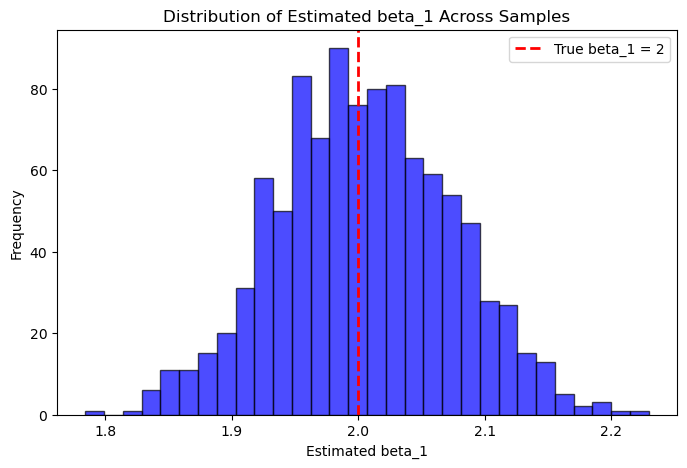

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(beta_1_estimates, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(beta_1, color='red', linestyle='dashed', linewidth=2, label=f'True beta_1 = {beta_1}')
plt.xlabel("Estimated beta_1")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated beta_1 Across Samples")
plt.legend()
plt.show()

Therefore, we can see that the values of beta_1 obtained by running a regression on each of the sample mostly follow a normal distribution, with their average value equal to (almost) the true population parameter, which is 2.
This is what is meant when we say that OLS estimators are unbiased. 

#### 07. Summary of what steps we did (and why)
1. We first defined the population regression function (PRF) and set the number of observations in the population to 100,000.
2. Then, we set the slope and intercept as 2 and 5, respectively. This creates the y value, and accordingly synthetic data adjusts. 
3. Thus, we can change the values, and the property would still hold. 
4. Next, we take 1,000 samples of 100 each, and store the values of $ \hat{\beta}_1 $ that we get after running a regression on each sample in the list.
5. Finally, we take the average of the $ \hat{\beta}_1 $ and see how close it is to the population values